In [1]:
import os
import sys
import numpy as np
from scipy.special import binom

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from correlation.qic import QuantileImpliedCorrelation
from functions.fin_econ import weights_identification

- use data from 17 of the longest listed companies in the DAX
- log returns
- daily frequency, starting from 16.11.1992 - 14.11.2022
- includes several crises (2000: dotcom, 2007: subprime, 2010: euro - greek, 2020: covid-19, 2022: ukraine)
- need extreme events, otherwise no data on tail events

In [2]:
asset_returns = pd.read_csv('DAX_17_log_daily.csv', parse_dates=['date'], index_col='date')

- select benchmark portfolios
- study equal weighted portfolios, exact identification
- each row corresponds to one portfolio
- to do: gradient for overidentified systems

In [3]:
p_weights = weights_identification(asset_returns.shape[1], 1)

QIC_DAX = QuantileImpliedCorrelation(asset_returns, p_weights)

We study and compare several cases

- consider implied correlation by Value at Risk (Quantile) and Expected Shortfall (Expectile)
- consider  $\alpha \in \{ 0.5, 0.1, 0.05, 0.01, 0.005, 0.001\}$
- compare upper and lower tail correlation and check for asymmetric behavior
- study standard errors and confidence intervals with different approaches (bootstrap vs. theoretical)

C:\Users\DM\AppData\Local\Temp\ipykernel_17596\1469949885.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


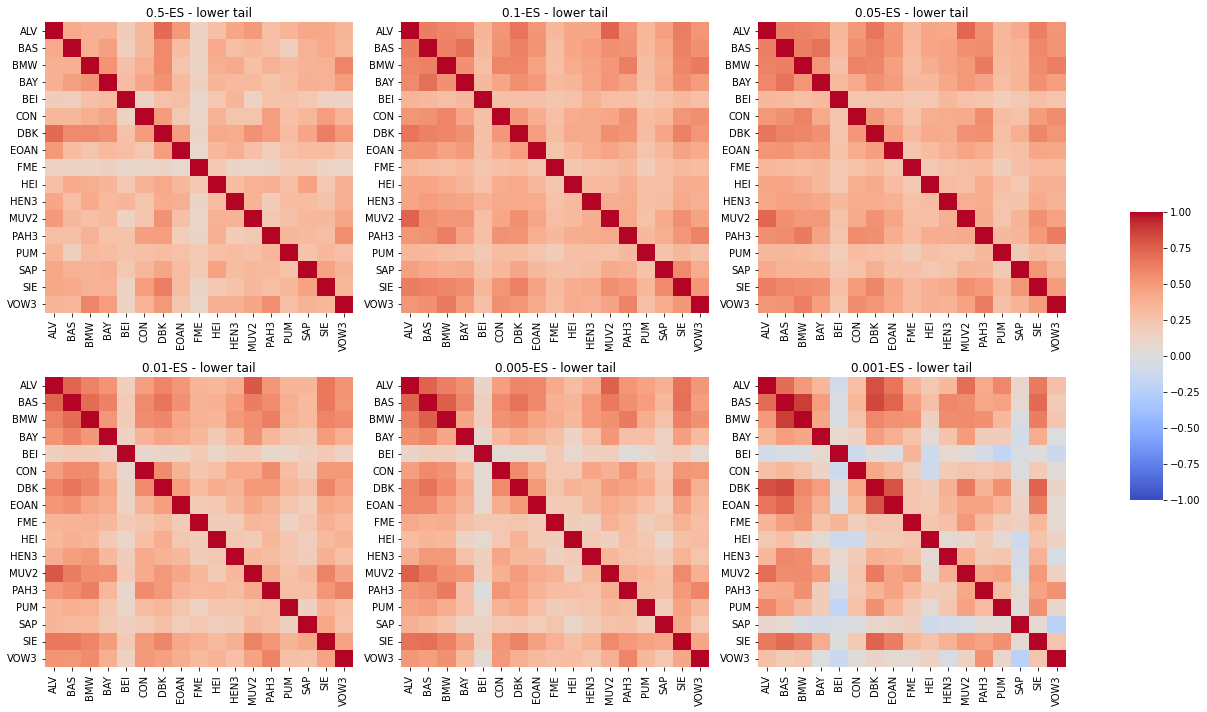

In [4]:
# https://stackoverflow.com/questions/28356359/one-colorbar-for-seaborn-heatmaps-in-subplot

risk = 'ES'                        # ES
tail = 'lower'                      # upper
alpha_lst = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

QIC_list = [QIC_DAX.qic(alpha, risk, risk, tail) for alpha in alpha_lst]

fig, axs = plt.subplots(2,3)
cbar_ax = fig.add_axes([1.05, .3, .03, .4])
fig.set_size_inches(15, 10)
for i, ax in enumerate(axs.flat):
    ax.set_title(f'{alpha_lst[i]}-{risk} - {tail} tail')
    sns.heatmap(QIC_list[i], ax=ax, vmax=1, vmin=-1, cmap='coolwarm', cbar=i == 0, cbar_ax=None if i else cbar_ax)
fig.tight_layout()

C:\Users\DM\AppData\Local\Temp\ipykernel_17596\974697320.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


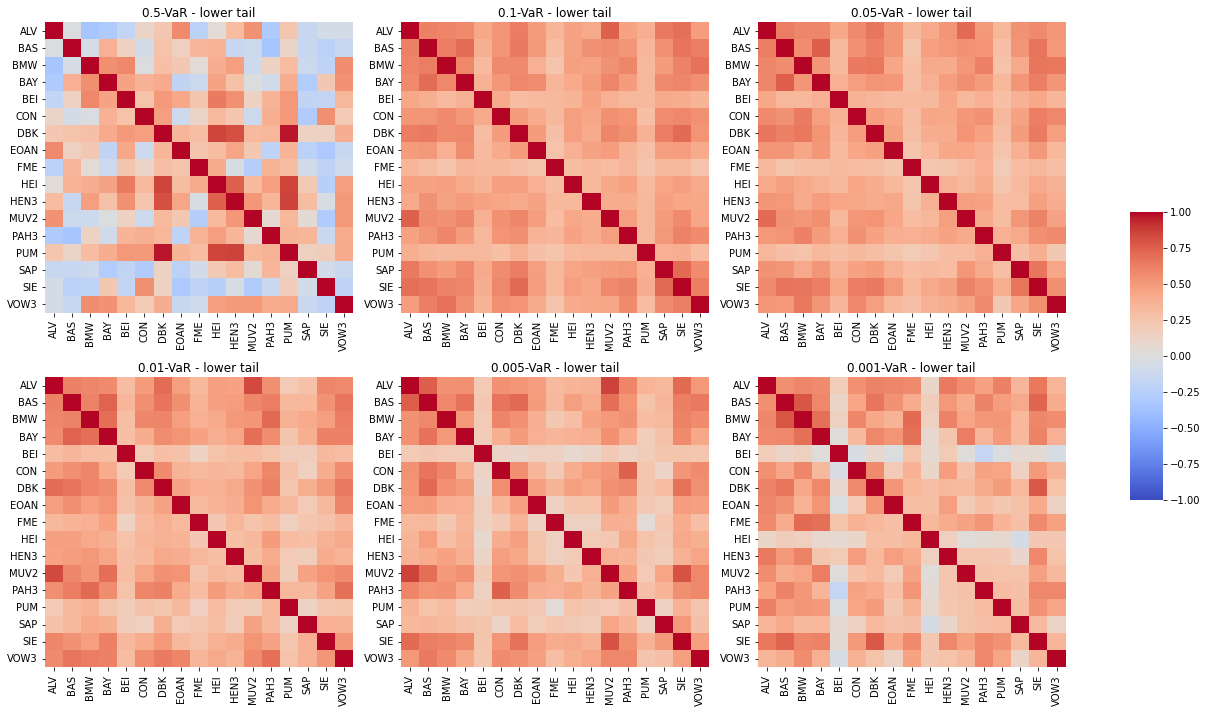

In [5]:
risk = 'VaR'
tail = 'lower'
alpha_lst = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

QIC_list = [QIC_DAX.qic(alpha, risk, risk, tail).astype(np.float64) for alpha in alpha_lst]

fig, axs = plt.subplots(2,3)
cbar_ax = fig.add_axes([1.05, .3, .03, .4])
fig.set_size_inches(15, 10)
for i, ax in enumerate(axs.flat):
    ax.set_title(f'{alpha_lst[i]}-{risk} - {tail} tail')
    sns.heatmap(QIC_list[i], ax=ax, vmax=1, vmin=-1, cmap='coolwarm', cbar=i == 0, cbar_ax=None if i else cbar_ax)
fig.tight_layout()

C:\Users\DM\AppData\Local\Temp\ipykernel_17596\813347471.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


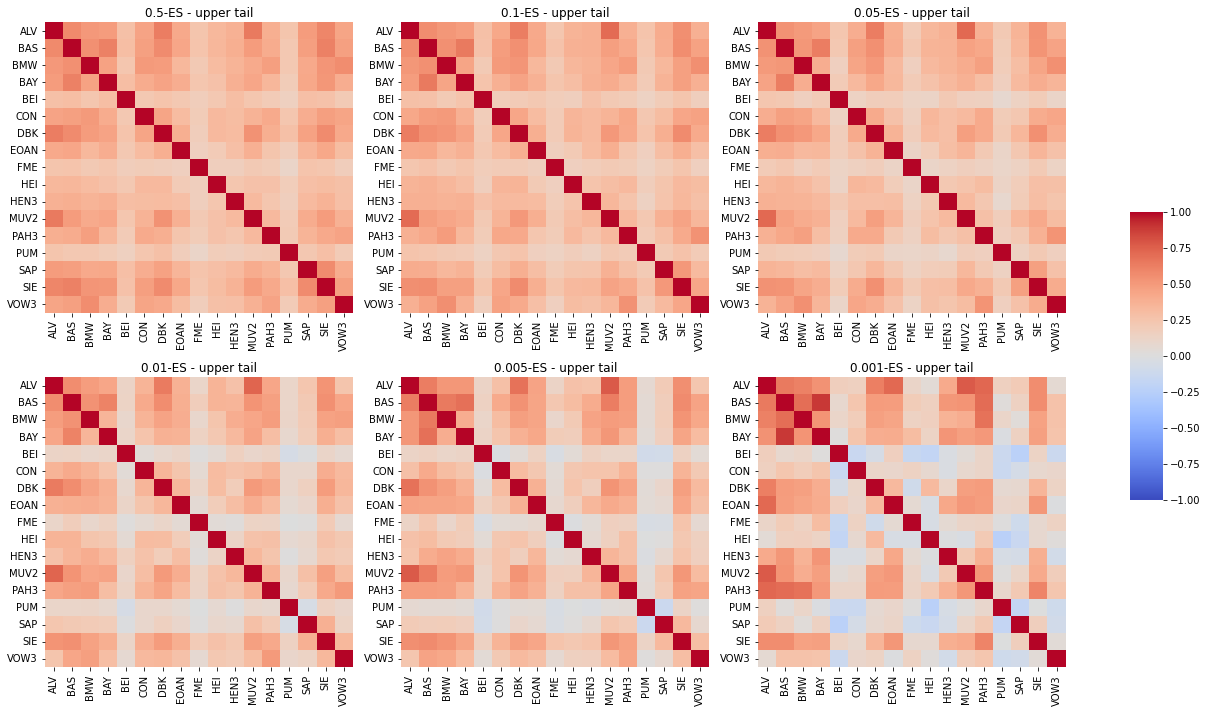

In [6]:
risk = 'ES'
tail = 'upper'
alpha_lst = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

QIC_list = [QIC_DAX.qic(alpha, risk, risk, tail) for alpha in alpha_lst]

fig, axs = plt.subplots(2,3)
cbar_ax = fig.add_axes([1.05, .3, .03, .4])
fig.set_size_inches(15, 10)
for i, ax in enumerate(axs.flat):
    ax.set_title(f'{alpha_lst[i]}-{risk} - {tail} tail')
    sns.heatmap(QIC_list[i], ax=ax, vmax=1, vmin=-1, cmap='coolwarm', cbar=i == 0, cbar_ax=None if i else cbar_ax)
fig.tight_layout()

C:\Users\DM\AppData\Local\Temp\ipykernel_17596\959980409.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


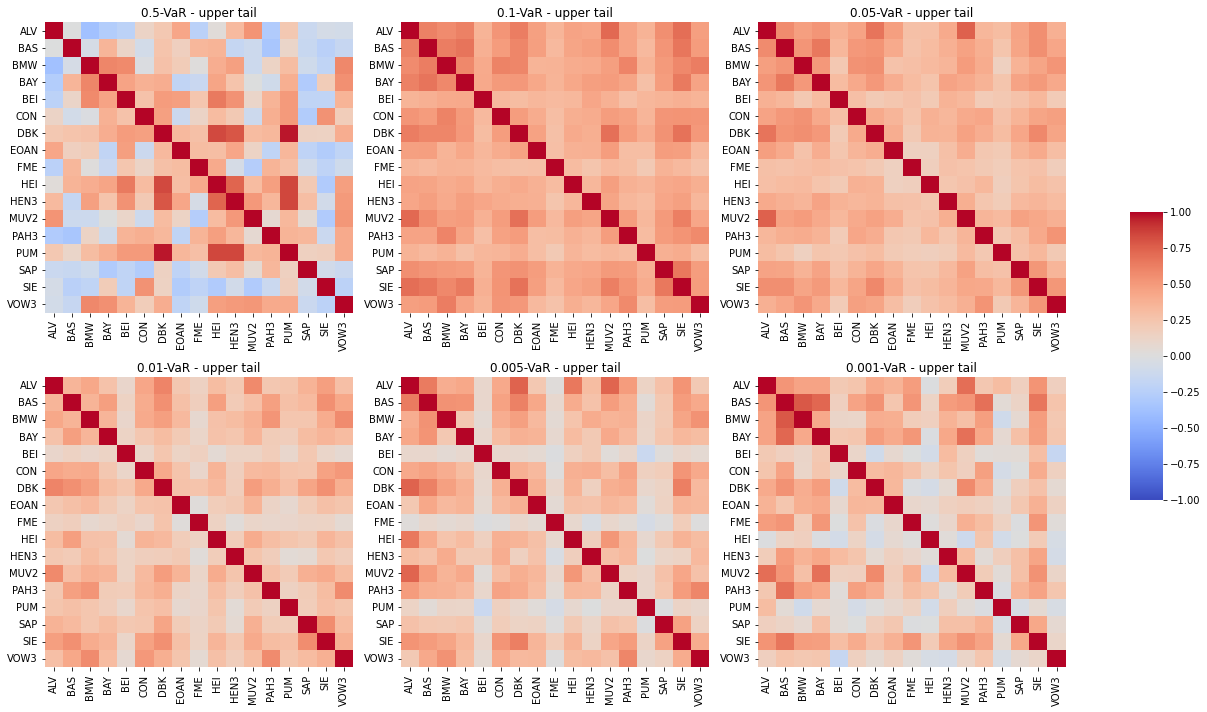

In [7]:
risk = 'VaR'                        # ES
tail = 'upper'                      # upper
alpha_lst = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

QIC_list = [QIC_DAX.qic(alpha, risk, risk, tail).astype(np.float64) for alpha in alpha_lst]

fig, axs = plt.subplots(2,3)
cbar_ax = fig.add_axes([1.05, .3, .03, .4])
fig.set_size_inches(15, 10)
for i, ax in enumerate(axs.flat):
    ax.set_title(f'{alpha_lst[i]}-{risk} - {tail} tail')
    sns.heatmap(QIC_list[i], ax=ax, vmax=1, vmin=-1, cmap='coolwarm', cbar=i == 0, cbar_ax=None if i else cbar_ax)
fig.tight_layout()

In [10]:
CI_theoretical = QIC_DAX.qic_confidence_interval(conf_lvl=0.95)

Number of bootstrap Iteration: 300


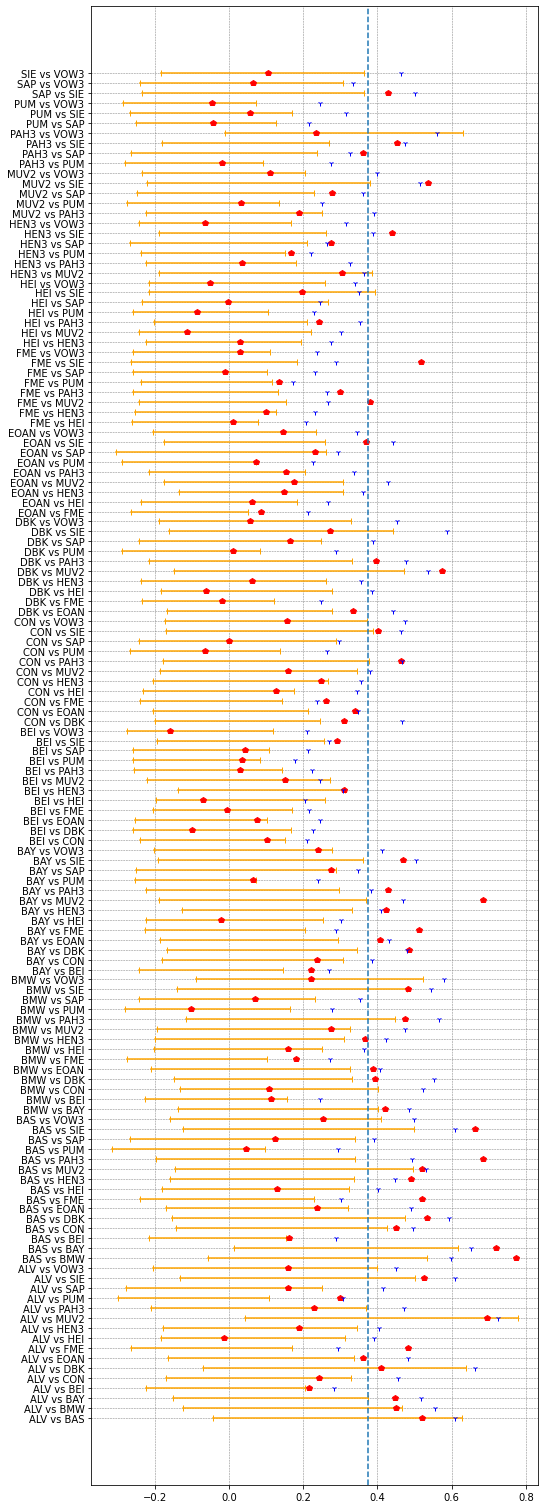

(<Figure size 576x1958.4 with 1 Axes>, <AxesSubplot:>)

In [12]:
QIC_DAX.plot_QIC_confidence_interval()


T = || J - P||^2

J ist \sqrt(j - j_truth) -> N(o, S)

matrix eucledian norm, maximum element zum Hypothesentest, kologorov smirnov
aufpassen, ob die gleichen sample, wegen tails, chi2 distribution vielleicht

erst perason gegen qic, sinn=?
dannach qic vs qic in anderen

viel lesen

test of eigentlich ein vektor gleich ist und nicht gleich die korrelations matrix

F-test, wie in einer Regression